In [ ]:
"""
PROBLEM STATEMENT:
- Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression
techniques to tackle this problem.
- The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie
by users or critics.
- Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build
a model that can estimate the ratings of movies accurately.

"""

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
credit_data = pd.read_csv("creditcard.csv")

In [5]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27814,34711,1.443955,-1.052462,-0.141721,-1.564017,-0.966274,-0.333886,-0.777060,0.023616,-2.168826,...,-0.479940,-1.165220,0.155226,-0.409701,0.179672,-0.446258,0.004329,0.000060,32.39,0.0
27815,34711,-0.263364,0.931818,1.193111,-0.507924,0.862019,0.249381,0.815449,-0.090801,-0.520583,...,-0.310112,-0.648621,-0.253746,-1.030111,-0.046091,0.107328,0.101296,-0.124600,1.49,0.0
27816,34712,0.976345,-1.024867,0.978714,0.639442,-1.413711,0.311635,-0.909035,0.232423,-0.493025,...,-0.279978,-0.599463,-0.081403,-0.059427,0.202311,-0.405753,0.055109,0.052975,151.00,0.0
27817,34712,1.464604,-0.437919,-0.018869,-1.057177,-0.154243,0.251215,-0.584866,-0.025483,-0.841369,...,-0.148384,-0.454571,-0.019732,-1.313689,0.379650,-0.368497,0.031746,0.007238,8.00,0.0
27818,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
credit_data.shape

(27819, 31)

In [8]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27819 entries, 0 to 27818
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27819 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27818 non-null  float64
 4   V4      27818 non-null  float64
 5   V5      27818 non-null  float64
 6   V6      27818 non-null  float64
 7   V7      27818 non-null  float64
 8   V8      27818 non-null  float64
 9   V9      27818 non-null  float64
 10  V10     27818 non-null  float64
 11  V11     27818 non-null  float64
 12  V12     27818 non-null  float64
 13  V13     27818 non-null  float64
 14  V14     27818 non-null  float64
 15  V15     27818 non-null  float64
 16  V16     27818 non-null  float64
 17  V17     27818 non-null  float64
 18  V18     27818 non-null  float64
 19  V19     27818 non-null  float64
 20  V20     27818 non-null  float64
 21  V21     27818 non-null  float64
 22

In [9]:
#checking null values
credit_data.isnull().sum()

Time      0
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [10]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,27819.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,...,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000
mean,20434.634315,-0.217255,0.149360,0.723559,0.221251,-0.199312,0.084607,-0.125687,0.028612,0.394412,...,-0.035045,-0.126646,-0.041207,0.010602,0.129963,0.023506,0.013398,0.004055,77.297298,0.003343
std,11866.057310,1.866645,1.545773,1.648474,1.425213,1.431480,1.325535,1.308413,1.314408,1.262314,...,0.803370,0.642121,0.544077,0.590914,0.436275,0.513862,0.393823,0.278450,219.651476,0.057724
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,9037.500000,-0.951060,-0.424408,0.271315,-0.690871,-0.788013,-0.658281,-0.595865,-0.162449,-0.420660,...,-0.246695,-0.547732,-0.174773,-0.326892,-0.132690,-0.336775,-0.063637,-0.008436,6.442500,0.000000
50%,24675.000000,-0.259642,0.163461,0.855090,0.202149,-0.230110,-0.174349,-0.068385,0.032587,0.305709,...,-0.093654,-0.100015,-0.049634,0.063056,0.169235,-0.054798,0.008119,0.020201,19.950000,0.000000
75%,31319.000000,1.166130,0.803933,1.483404,1.102574,0.316960,0.471794,0.445844,0.290104,1.152587,...,0.079173,0.281732,0.075486,0.398937,0.412015,0.305465,0.091483,0.076658,69.507500,0.000000
max,34712.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


# data analysis

In [11]:
#columns in dataset
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
#unique value in class columns
credit_data.Class.unique()

array([ 0.,  1., nan])

In [13]:
#class columns has two values i.e. 0 & 1 where 1 is fraud case and valid case
fraud_case = credit_data[credit_data['Class'] == 1]
valid_case = credit_data[credit_data['Class'] == 0]

print("Number of fraud case:", (len(fraud_case)))
print("Number of valid case:", (len(valid_case)))

total = len(fraud_case) / len(valid_case)
total

Number of fraud case: 93
Number of valid case: 27725


0.0033543733092876466

In [14]:
#in percentage
per = len(fraud_case) / len(credit_data['Class'])*100
per

0.3343038930227542

#only 0.17% transactions are fraud

#class distribution

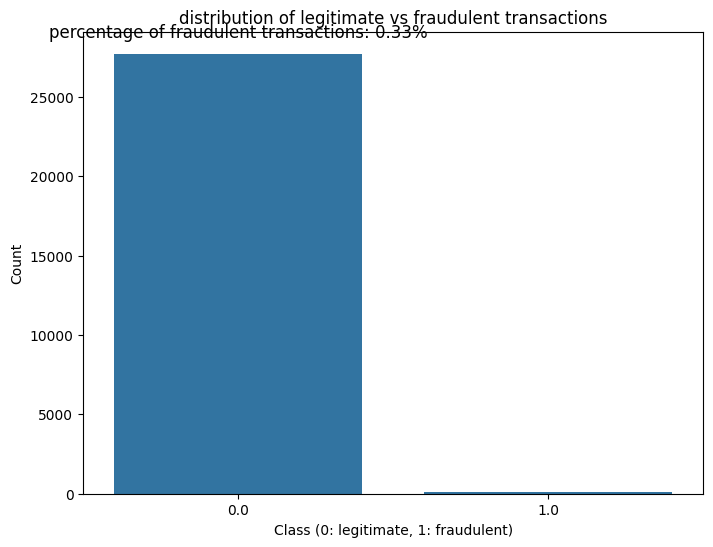

In [15]:
#count the number of occurences for each class (0 for legitimate, 1 for fraudulent)
class_counts = credit_data['Class'].value_counts()

#calculate the percentage of fraudulent transactions
percentage_fraudulent  = (class_counts[1] / class_counts.sum())*100

plt.figure(figsize=(8,6))
sns.countplot(x='Class', data=credit_data)
plt.title("distribution of legitimate vs fraudulent transactions")
plt.xlabel("Class (0: legitimate, 1: fraudulent)")
plt.ylabel("Count")

#display thr percentage of fraudulent transactions on the plot
plt.text(0, class_counts[0] + 1000, 'percentage of fraudulent transactions: {:.2f}%'.format(percentage_fraudulent), fontsize=12, ha='center')

plt.show()

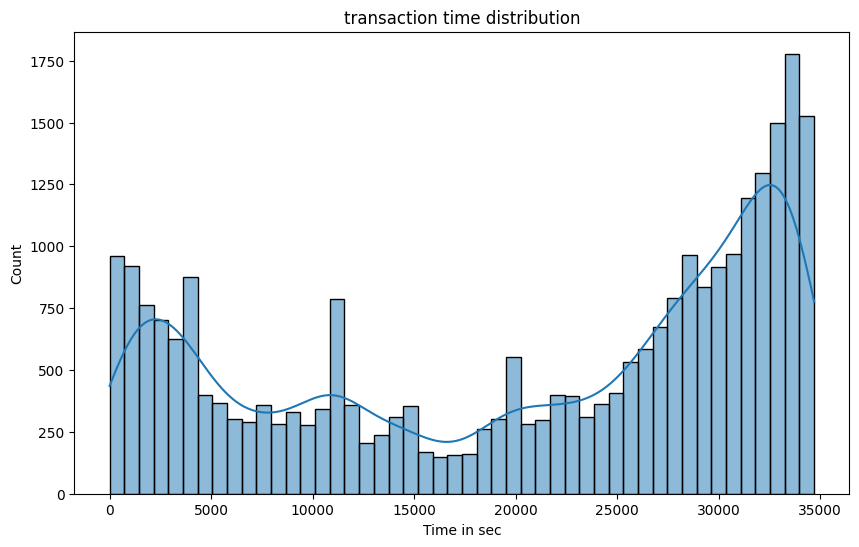

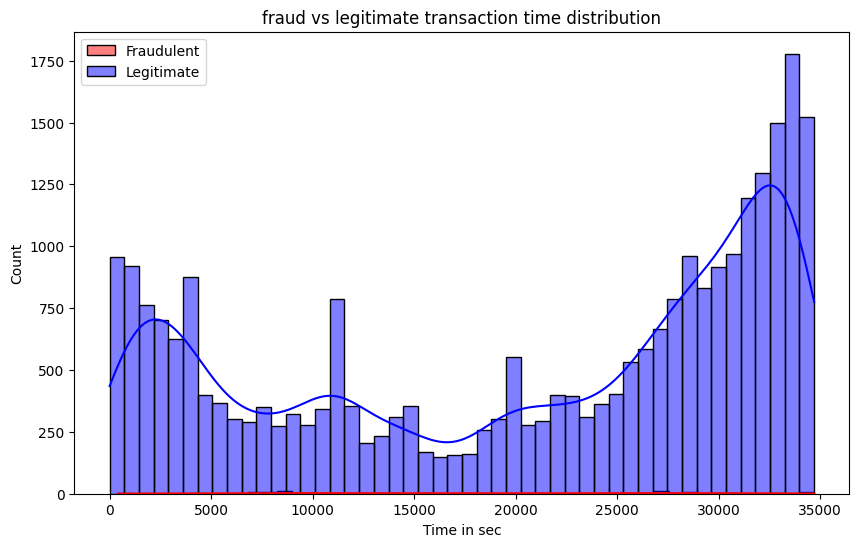

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(credit_data['Time'], bins=48, kde=True)
plt.title("transaction time distribution")
plt.xlabel("Time in sec")
plt.ylabel("Count")

#check if there are specific times of day when fraud is more likely to occur
plt.figure(figsize=(10,6))
sns.histplot(credit_data[credit_data['Class'] == 1]['Time'], bins=48, kde=True, color='red', label='Fraudulent')
sns.histplot(credit_data[credit_data['Class'] == 0]['Time'], bins=48, kde=True, color='blue', label='Legitimate')
plt.title("fraud vs legitimate transaction time distribution")
plt.xlabel("Time in sec")
plt.ylabel("Count")
plt.legend()

plt.show()

#transaction amount analysis

In [17]:
#calculate summary statistics for both groups
legitimate_transactions = credit_data[credit_data['Class'] == 0]
legitimate_summary = legitimate_transactions.describe()

fraudulent_transactions = credit_data[credit_data['Class'] == 1]
fraudulent_summary = fraudulent_transactions.describe()

print("summary statistics for legitimate transactions: ")
print(legitimate_summary)
print("\nsummary statistics for fraudulent transactions: ")
print(fraudulent_summary)

summary statistics for legitimate transactions: 
               Time            V1            V2            V3            V4  \
count  27725.000000  27725.000000  27725.000000  27725.000000  27725.000000   
mean   20440.754518     -0.190595      0.129284      0.765200      0.201632   
std    11873.023524      1.721737      1.482707      1.372476      1.376569   
min        0.000000    -28.344757    -40.978852    -27.747084     -5.172595   
25%     9039.000000     -0.945643     -0.426345      0.276651     -0.694727   
50%    24689.000000     -0.254796      0.160303      0.858871      0.198031   
75%    31329.000000      1.166592      0.794454      1.485089      1.094666   
max    34712.000000      1.960497     14.845545      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  27725.000000  27725.000000  27725.000000  27725.000000  27725.000000   
mean      -0.180681      0.092904     -0.099318      0.014884      0.405538   
st

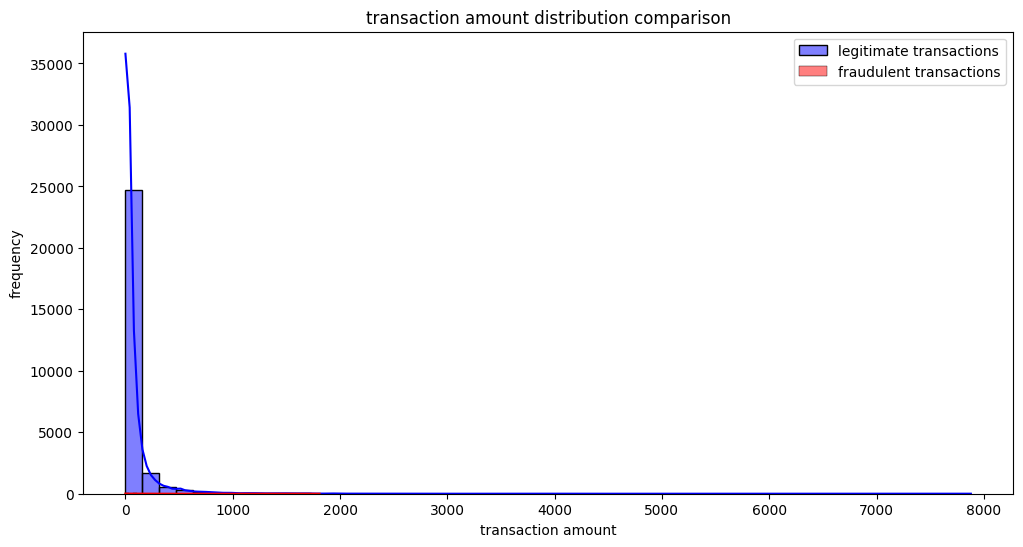

In [18]:
#separate data fro legitimate and fraudulent transactions
legitimate_transactions = credit_data[credit_data['Class'] == 0]['Amount']
fraudulent_transactions = credit_data[credit_data['Class'] == 1]['Amount']

plt.figure(figsize=(12,6))
sns.histplot(legitimate_transactions, color='blue', kde=True, label='legitimate transactions', bins=50)
sns.histplot(fraudulent_transactions, color='red', kde=True, label='fraudulent transactions', bins=50)

plt.title('transaction amount distribution comparison')
plt.xlabel('transaction amount')
plt.ylabel('frequency')
plt.legend()

plt.show()

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.017843 -0.085133 -0.074388 -0.027062 -0.077892 -0.033042   
V1      0.017843  1.000000 -0.194719  0.345856 -0.114341  0.129202  0.117884   
V2     -0.085133 -0.194719  1.000000 -0.307192  0.130604 -0.180550 -0.024093   
V3     -0.074388  0.345856 -0.307192  1.000000 -0.171269  0.346188  0.026216   
V4     -0.027062 -0.114341  0.130604 -0.171269  1.000000 -0.093218 -0.047014   
V5     -0.077892  0.129202 -0.180550  0.346188 -0.093218  1.000000  0.098720   
V6     -0.033042  0.117884 -0.024093  0.026216 -0.047014  0.098720  1.000000   
V7     -0.020945  0.220005 -0.086011  0.396023 -0.136110  0.103534  0.115448   
V8      0.044383 -0.141597  0.075406 -0.336094  0.109543 -0.157343 -0.086550   
V9     -0.293857 -0.022197 -0.041766  0.178833 -0.059679  0.042272  0.052875   
V10     0.095036  0.040906 -0.024396  0.228420 -0.097926  0.172361  0.059299   
V11    -0.161147 -0.047651  0.110534 -0.

<ipython-input-19-bf280273cea8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='magma')


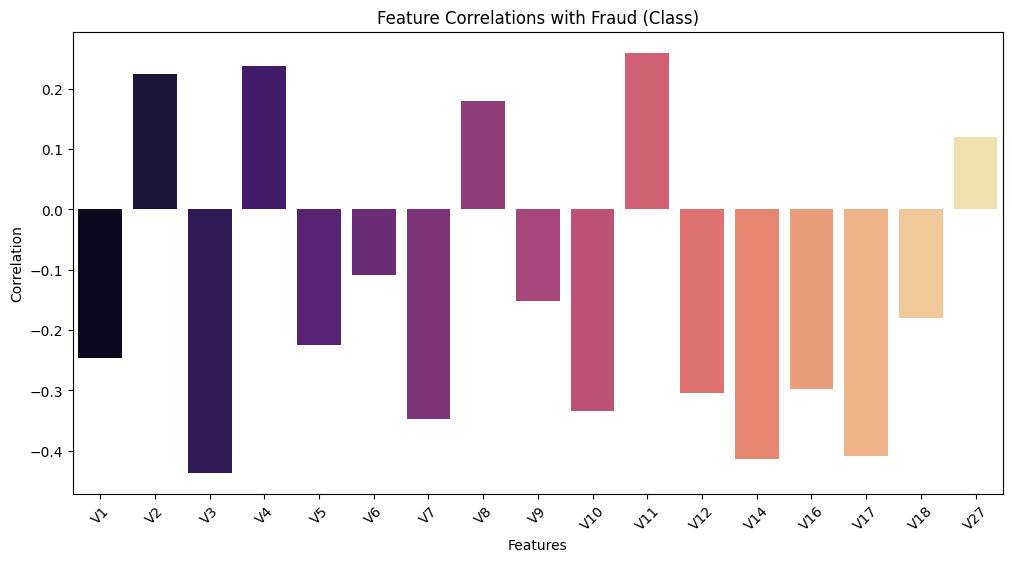

In [19]:
#calculate the correlation matrix
correlation_matrix = credit_data.corr()
print(correlation_matrix)

#filter the correlations of features with the target variable('Class')
feature_correlations = correlation_matrix['Class'].drop('Class')
print(feature_correlations)

correlation_threshold = 0.1

highly_correlated_features = feature_correlations[abs(feature_correlations) > correlation_threshold]

plt.figure(figsize=(12,6))
sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='magma')
plt.title('Feature Correlations with Fraud (Class)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()


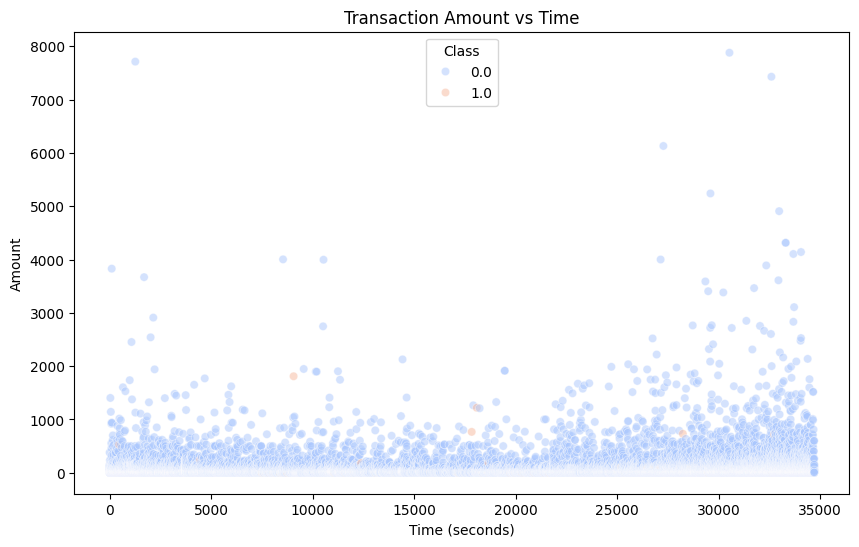

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=credit_data['Time'], y=credit_data['Amount'], hue=credit_data['Class'], palette='coolwarm', alpha=0.5)
plt.title('Transaction Amount vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount')
plt.show()

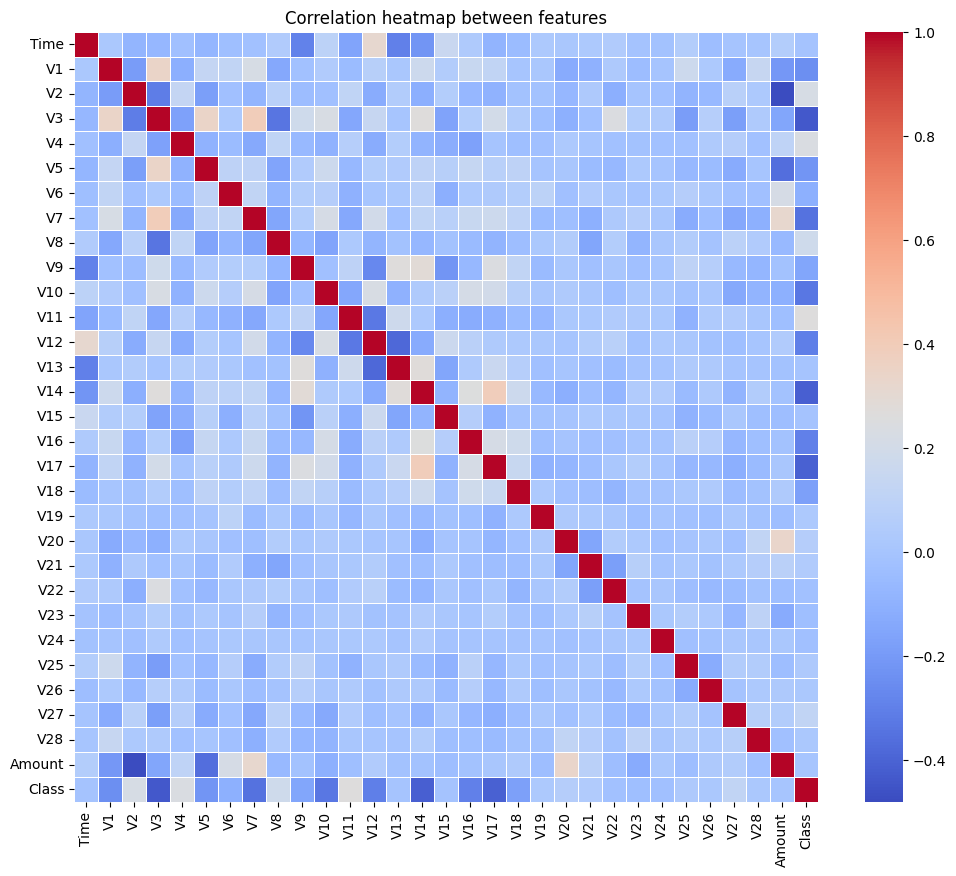

In [21]:
#visualize heatmap for correlation matrix between features
correlation_matrix = credit_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation heatmap between features')
plt.show()

#developing model

In [22]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, classification_report, confusion_matrix)

In [23]:
X = credit_data.drop(['Class'], axis=1)
Y = credit_data['Class']

print(f"vlaue and shapes :", [X.values, X.shape])
print(f"vlaue and shapes :", [Y.values, Y.shape])

vlaue and shapes : [array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 3.47120000e+04,  9.76345026e-01, -1.02486675e+00, ...,
         5.51087002e-02,  5.29749101e-02,  1.51000000e+02],
       [ 3.47120000e+04,  1.46460388e+00, -4.37919234e-01, ...,
         3.17459328e-02,  7.23836880e-03,  8.00000000e+00],
       [ 3.40000000e+01,             nan,             nan, ...,
                    nan,             nan,             nan]]), (27819, 30)]
vlaue and shapes : [array([ 0.,  0.,  0., ...,  0.,  0., nan]), (27819,)]


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [27]:
import numpy as np

# Find indices of NaN values in Y_train
nan_indices = np.isnan(Y_train)

# Remove rows with NaNs from both X_train_imputed and Y_train
X_train_imputed_cleaned = X_train_imputed[~nan_indices]
Y_train_cleaned = Y_train[~nan_indices]

# Now you can train your RandomForestClassifier on the cleaned data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_imputed_cleaned, Y_train_cleaned)
y_pred = model.predict(X_test_imputed)


In [28]:
print(y_pred)
print(Y_test)

[0. 0. 0. ... 0. 0. 0.]
18651    0.0
6091     0.0
18098    0.0
26651    0.0
9072     0.0
        ... 
21076    0.0
11387    0.0
668      0.0
22698    0.0
20571    0.0
Name: Class, Length: 5564, dtype: float64


#model evaluation

In [29]:
print("confusion matrix:\n", confusion_matrix(Y_test,y_pred))
print("\ncolassification report:\n", classification_report(Y_test,y_pred))
print("\naccuracy score:", accuracy_score(Y_test,y_pred))

confusion matrix:
 [[5540    1]
 [   3   20]]

colassification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5541
         1.0       0.95      0.87      0.91        23

    accuracy                           1.00      5564
   macro avg       0.98      0.93      0.95      5564
weighted avg       1.00      1.00      1.00      5564


accuracy score: 0.9992810927390366
